# Final Exam (part 3) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Vincent Noguera

## 3. Fourier analysis: removing Herringbone MRI artifacts

This problem consist of using Fourier analysis to remove undesired Herringbone artifacts from magnetic resonance images (MRI).

The file provided below **herringbone-mri-artifact.jpg** contains a brain MRI image affected by the Herringbone artifact. This artifact can be produced by electromagnetic spikes by gradient coils, a fluctuating power supply, or radiofrequency pulse discrepancies during MRI scanning. In real space, the regularly spaced stripes resemble the appearance of a fabric with a herringbone pattern (which gives the artifact its name). In this image, the artifact covers the entire image with multiple diagonal stripes, which would be seen as spike artifacts in Fourier space. Your task is to remove them.

#### Download the image file:
https://github.com/wbandabarragan/physics-teaching-data/blob/main/2D-data/herringbone-mri-artifact.jpg

#### Reference:
Case courtesy of Frank Gaillard, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/19695?lang=us">rID: 19695</a>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from PIL import Image, ImageDraw


#### Image I/O:

(a) Inspect the file. Then, write a python function that reads the data from the **herringbone-mri-artifact.jpg** file, and returns its 3 layers (channels) as numpy arrays.

(b) Call your function, select a single channel and make a map of it. Identify and label the Herringbone artifacts on the image using small arrows.




In [10]:
def inspect_Image(img_path):
    image = io.imread(img_path)

    # print(type(image))
    
    print(image.shape)
    
    print(np.max(image), np.min(image))

    # plt.figure()

    # plt.imshow(image)
    
    # plt.show()
    # Use indexing:

    imageR = image[:, :, 0]
    imageG = image[:, :, 1]
    imageB = image[:, :, 2]
    
    # print(imageR.shape, imageG.shape, imageB.shape)
    return imageR, imageG, imageB, image
    

In [11]:
img_path = "herringbone-mri-artifact.jpg"

imageR, imageG, imageB, image = inspect_Image(img_path)

(1175, 1006, 3)
255 14


Text(200, 370, ' ')

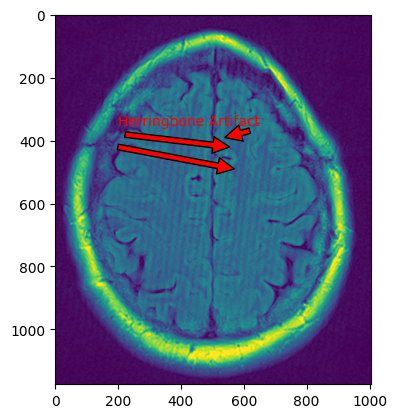

In [12]:
plt.imshow(imageB)
# plt.annotate("Herringbone Artifact", xy=(450,450), xytext=(200+10, 400+50),
                     # arrowprops=dict(facecolor='red', shrink=0.05), color='red')
# plt.annotate("Herringbone Artifact", xy=(450,450), xytext=(200+10, 400+50),
#                      arrowprops=dict(facecolor='red'), color='red')
plt.annotate("", xy=(570,490), xytext=(200, 400+20),
                     arrowprops=dict(facecolor='red'), color='red')

plt.annotate("Herringbone Artifact", xy=(540,390), xytext=(200, 400-50),
                     arrowprops=dict(facecolor='red'), color='red')
plt.annotate(" ", xy=(555,420), xytext=(200, 400-30),
                     arrowprops=dict(facecolor='red'), color='red')

#### 2D Fourier transform:

(c) Create a function that Fourier transforms this image and returns the Fourier image and the correct frequencies.

(d) Call your function in (c), and make a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right. Identify and label the Herringbone artifacts on the Fourier image.

(e) Briefly comment, how do the image artifacts look in Fourier space? 


In [13]:
def fourier_image(image1):
    #Fourier transform
    fourier = np.fft.fft2(image1)
    #Shifting
    shifted_fourier = np.fft.fftshift(fourier)
    #Get the norm of the shifted vector
    norm_fourier = np.abs(shifted_fourier)
    d_spacing = 1
    # Frequencies:
    freqs_x = np.fft.fftfreq(image1.shape[0], d = d_spacing)
    freqs_y = np.fft.fftfreq(image1.shape[1], d = d_spacing)
    ##Show the plot and what are going to quit the Herringbone
    return fourier, freqs_x, freqs_y
    """
    plt.figure(figsize = (4,3))

    Z1 = plt.pcolor(np.log10(norm_fourier), shading='auto', cmap = "viridis")
    # plt.gca().invert_yaxis()
    plt.colorbar(Z1, label='Magnitude (log scale)')
    #To appreciate the frequencies that we have to remove
    plt.xlim(400,600)
    plt.ylim(500,700)
    plt.show()
    """
    """
    #This also can be used and provide a better resolution image to identify the frequencies that we are interested in remove
    #But this also changes the scale...
    plt.figure(figsize = (4,3))

    plt.imshow(np.log10(norm_fourier), extent=(freqs_x.min(), freqs_x.max(), freqs_y.min(), freqs_y.max()))
    # plt.gca().invert_yaxis()
    plt.colorbar(Z1)
    plt.colorbar(label='Magnitude (log scale)')
    plt.show()
    """
    ##Create a mask based on the image commented:
    mask_1 = Image.new(mode="RGB", size=(shifted_fourier_2.shape[1], shifted_fourier_2.shape[0]))

    draw = ImageDraw.Draw(mask_1)
    #Thorugh the 1st image, we can appreciate that are here the frequencies that we have to remove
    draw.ellipse([(455, 575), (465, 585)], fill=(255, 0, 0), outline=(0, 0, 0))
    
    draw.ellipse([(545, 590), (550, 595)], fill=(255, 0, 0), outline=(0, 0, 0))

    #Binary
    mask_1 = np.array(mask_1)[:,:,0]//255
    ##Invert to clean the image:
    mask_2 = - mask_1 + 1
    ##Apply the mask:
    masked_fourier = shifted_fourier*mask_2
    ### Check the changes in the image, the points are too 
    """
    plt.figure(figsize = (5,4))

    Z1 = plt.pcolor(np.log10(np.abs(masked_fourier)), shading='auto', cmap ="inferno")
    
    plt.colorbar(Z1)
    
    plt.show()
    """
    #Return the frequency shift
    inv_filter_ = np.fft.ifftshift(masked_fourier)
    #Convert back to spatial domain
    inv_filter_ = np.fft.ifft2(inv_filter_)
    return inv_filter_

In [14]:
inv_filter = fourier_image(imageB)
print(f"Original image dimensions: {imageB.shape}")
print(f"Filtered image dimensions: {inv_filter_3_2.shape}")


# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Load the images from the provided file paths
# img_supersonic = Image.open(folder+"/"+supersonic_file)
# img_subsonic = Image.open(folder+"/"+subsonic_file)

# Plot the supersonic image in the left panel
axes[0].imshow(image)
axes[0].axis('off')  # Hide axis ticks and labels
axes[0].set_title("Original image")  # Set the left panel title

# Plot the subsonic image in the right panel
axes[1].pcolor(inv_filter.real, shading='auto', cmap ="viridis")
axes[1].invert_yaxis()
axes[1].axis('off')  # Hide axis ticks and labels
axes[1].set_title("Filtered image")  # Set the right panel title

# Adjust layout to avoid overlap and save the final figure
plt.tight_layout()
# plt.savefig(folder+"/"+save_name, dpi=150)
plt.show()  # Display the combined figure
plt.close()

Original image dimensions: (1175, 1006)


NameError: name 'inv_filter_3_2' is not defined

In [15]:
print(imageB[1].shape)

(1006,)


In [16]:
fourier_2 = np.fft.fft2(imageB)
filtered_F_signal = fourier_2.copy()

shifted_fourier_2 = np.fft.fftshift(fourier_2)
# Inverse Fourier transform
ifourier_Zn = np.fft.ifft2(filtered_F_signal)

norm_fourier_2 = np.abs(shifted_fourier_2)
# Shift the signal so that the low frequencies are at the centre\
# fourier_Z2n = np.fft.fftshift(fourier_Zn)
d_spacing = 1
# Frequencies:
freqs_x = np.fft.fftfreq(imageB.shape[0], d = d_spacing)
freqs_y = np.fft.fftfreq(imageB.shape[1], d = d_spacing)

# Frequency mesh:
freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))
print(freqs_X.shape)
print(freqs_Y.shape)
norm_test = norm_fourier_2[::-1]
print(norm_test.shape)
# Norm of Fourier transform:
norm_fourier_2 = np.abs(shifted_fourier_2)
# norm_fourier_Zn2 = np.abs(fourier_Z2n)


# Compute the frequencies for the x and y axes
# rows, cols = imageB.shape
# freq_x = np.fft.fftfreq(cols, d=1)  # Frequency in the x direction
# freq_y = np.fft.fftfreq(rows, d=1)  # Frequency in the y direction
# freq_x, freq_y = np.meshgrid(freq_x, freq_y) 

(1006, 1175)
(1006, 1175)
(1175, 1006)


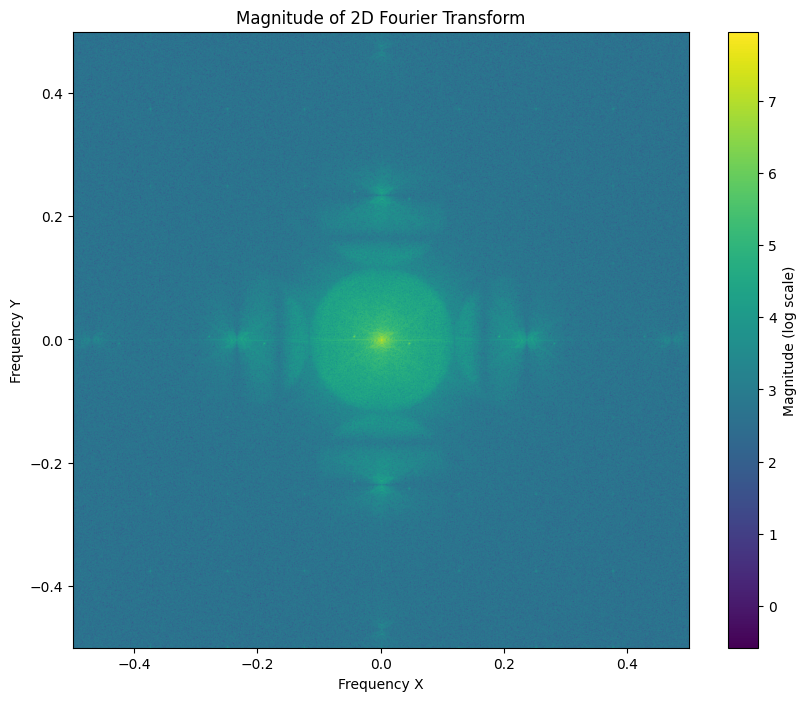

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(np.log10(norm_fourier_2), extent=(freqs_x.min(), freqs_x.max(), freqs_y.min(), freqs_y.max()))
plt.title('Magnitude of 2D Fourier Transform')
plt.xlabel('Frequency X')
plt.ylabel('Frequency Y')
plt.colorbar(label='Magnitude (log scale)')
# plt.xlim(400,600)
# plt.ylim(500,700)
plt.show()


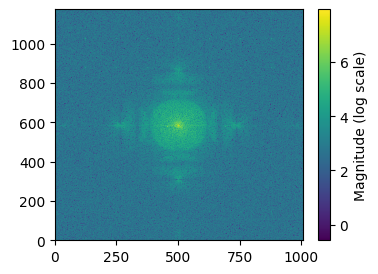

In [18]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis")
# plt.gca().invert_yaxis()

# Z1.colorbar(label='Magnitude (log scale)')
plt.colorbar(Z1, label='Magnitude (log scale)')
# plt.xlim(400,600)
# plt.ylim(500,700)
plt.show()

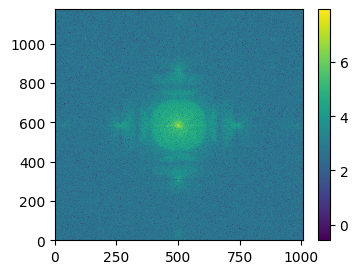

In [19]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis")
# plt.gca().invert_yaxis()
plt.colorbar(Z1)
# plt.xlim(400,600)
# plt.ylim()
plt.show()

In [20]:
print(shifted_fourier_2.shape[1])
print(len(shifted_fourier_2))
print(norm_fourier_2.shape[0])

1006
1175
1175


In [21]:
image_centre = [shifted_fourier_2.shape[0]//2, shifted_fourier_2.shape[1]//2]

print(image_centre)

radius_centre = 10 #pixels

[587, 503]


In [22]:
mask_1 = Image.new(mode="RGB", size=(shifted_fourier_2.shape[1], shifted_fourier_2.shape[0]))

draw = ImageDraw.Draw(mask_1)

draw.ellipse([(455, 575), (465, 585)], fill=(255, 0, 0), outline=(0, 0, 0))

draw.ellipse([(545, 590), (550, 595)], fill=(255, 0, 0), outline=(0, 0, 0))

255 0


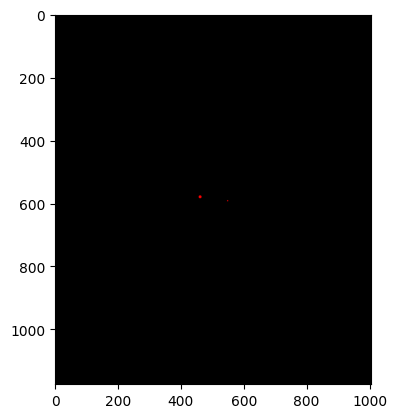

In [23]:
# %matplotlib inline
plt.imshow(mask_1)
# plt.gca().invert_yaxis()

print(np.max(mask_1), np.min(mask_1))

In [496]:
mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

[0 1]


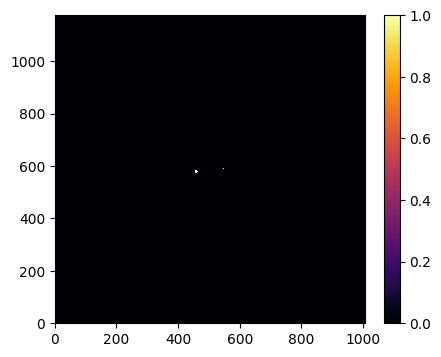

In [497]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_1, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

/tmp/ipykernel_193557/2479465377.py:4: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")
/tmp/ipykernel_193557/2479465377.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


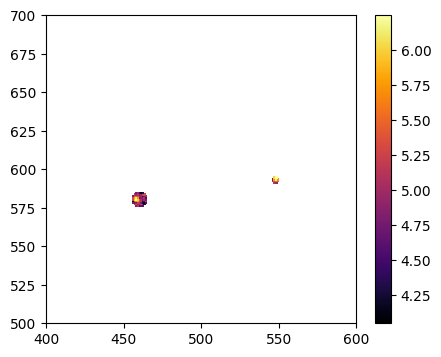

In [498]:
masked_fourier_3 = shifted_fourier_2*mask_1
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.xlim(400,600)
plt.ylim(500,700)
plt.show()

In [499]:
inv_filter_3 = np.fft.ifftshift(masked_fourier_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

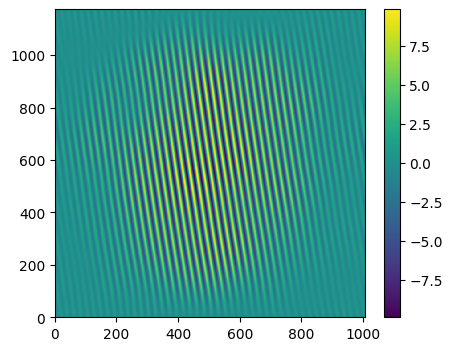

In [500]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)


plt.show()

In [501]:
mask_2 = - mask_1 + 1

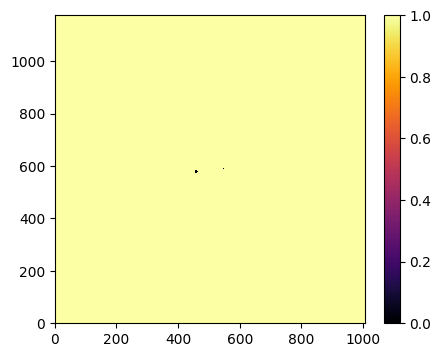

In [502]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_2, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [503]:
masked_fourier_3_2 = shifted_fourier_2*mask_2

/tmp/ipykernel_193557/793016055.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")
/tmp/ipykernel_193557/793016055.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


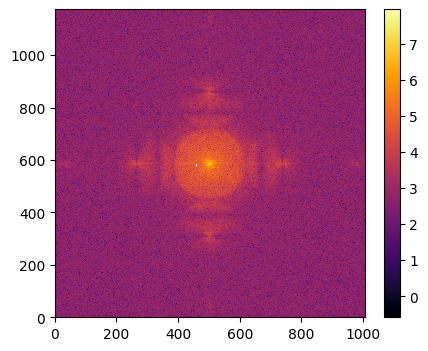

In [504]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [505]:
inv_filter_3_2 = np.fft.ifftshift(masked_fourier_3_2)
inv_filter_3_2 = np.fft.ifft2(inv_filter_3_2)

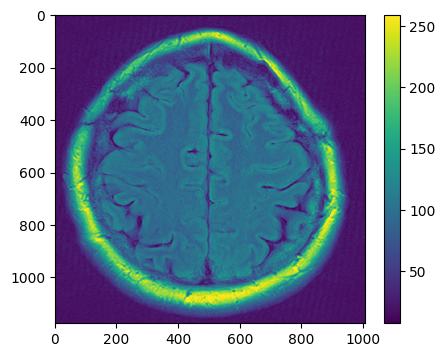

In [506]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3_2.real, shading='auto', cmap ="viridis")

plt.gca().invert_yaxis()

plt.colorbar(Z1)

plt.show()

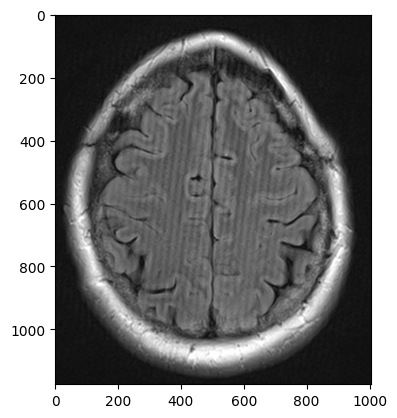

In [131]:

plt.imshow(image)



#### Masking and filtering:

(f) Create an appropriate mask for the Fourier image that matches the features associated with the Herringbone artifacts. Plot the mask.

(g) Use your mask from (f) to remove the Herringbone artifacts from the Fourier image.

(h) Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the Herringbone artifacts) on the right.



#### Artifact-free image:

(i) Create a function that combines all the previous steps. The function should receive an input image channel, apply the Fourier filter to it and return the original and the filtered channel images. Call and apply your filter function to the other two channels of the **herringbone-mri-artifact.jpg** image.

(j) Using the output clean images from (i), reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artifact-free 3-layered image. Briefly comment on your results.